# Q1 - Visualize Macaw

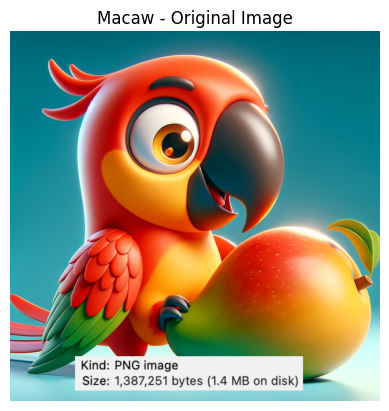

In [1]:
import matplotlib.pyplot as plt
from skimage import io

img_path = 'Macaw.webp'
img = io.imread(img_path)

plt.imshow(img)
plt.title('Macaw - Original Image')
plt.axis('off')
plt.show()



# Q2 Image Segmentation

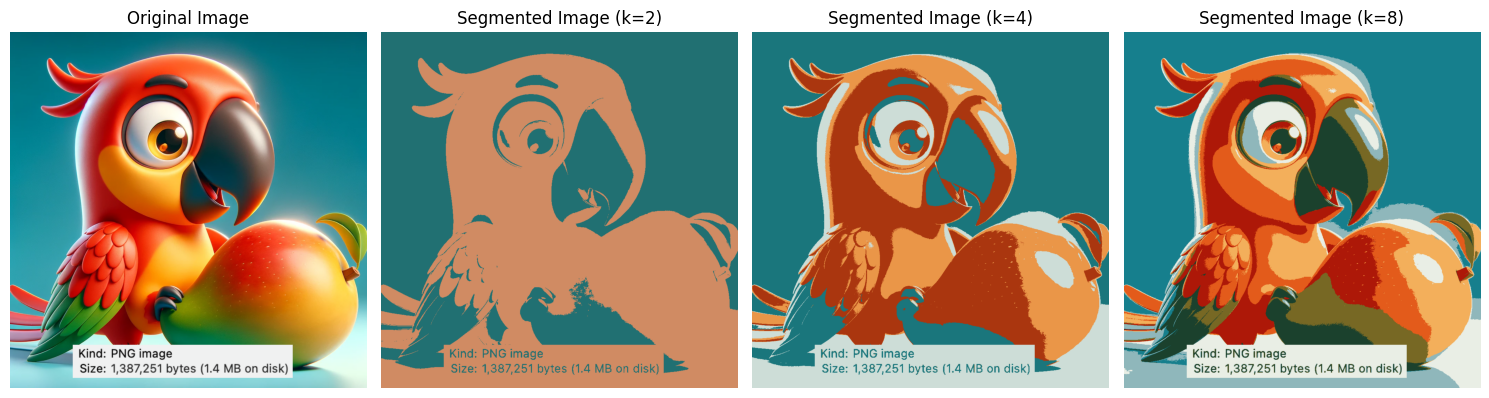

In [7]:
# 1. Flatten the image, each row represents a pixel's RGB values
img_flatten = img.reshape(-1, 3)

# 2. Perform KMeans clustering for k=2, 4, 8
from sklearn.cluster import KMeans
k_values = [2, 4, 8]
kmeans_models = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flatten)
    kmeans_models.append(kmeans)

# 3. Replace each pixel's RGB value with the centroid to create a segmented image
segmented_imgs = []
for kmeans in kmeans_models:
    segmented_img = kmeans.cluster_centers_[kmeans.labels_.astype(int)]  # Fix applied here
    segmented_imgs.append(segmented_img.reshape(img.shape))

# 4. Display the segmented images along with the original image
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, k in enumerate(k_values):
    axes[i+1].imshow(segmented_imgs[i].astype('uint8'))  # Ensure correct data type for RGB values
    axes[i+1].set_title(f'Segmented Image (k={k})')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()


# Q3 Analyze the results

### 1. How does increasing k affect the segmented image
Increaseing the number of clusters increases the number of colors in the image.

### 2. Trade-offs between using small and a large k
If one gradually increases k one can decide when enough information is stored. The trade-off is between resolution and data size, where increaseing k also increases data size.